In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


import gc
import os 
import fpfs
import fitsio
import galsim
import logging
import matplotlib.pylab as plt
from astropy.visualization import simple_norm
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy.lib.recfunctions as rfn

import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 2.0 #set the value globally

In [4]:
1/0.2826379542395*0.168*2.335

1.3879240000003406

0

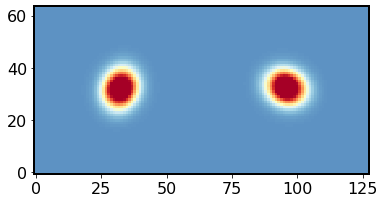

In [20]:
outDir='galaxy_basicShift_psf60'
a=fpfs.simutil.make_basic_sim(outDir,'g1-0000',Id0=6,ny=1,nx=2,do_write=False,return_array=True)
plt.close()
plt.imshow(a,aspect='equal',cmap='RdYlBu_r',origin='lower',interpolation='None',\
             norm=simple_norm(a,'asinh',asinh_a=0.1,min_cut=-0.01,max_cut=0.2))
gc.collect()

5

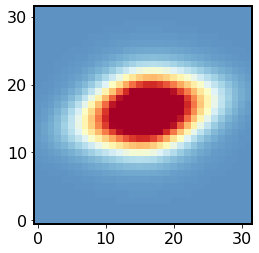

In [70]:
rcut=16
scale=0.168
ngrid=64
beg =   ngrid//2-rcut
end =   beg+2*rcut

psfFWHM =   0.6
psfInt  =   galsim.Moffat(beta=3.5,fwhm=psfFWHM,trunc=psfFWHM*4.)
psfInt  =   psfInt.shear(e1=0.02,e2=-0.02)
psfInt  =   psfInt.shift(
    dx  =   0.5*scale,
    dy  =   0.5*scale,
)
ig=32

outDir='galaxy_basicCenter_psf60'
psfData =   psfInt.drawImage(nx=ngrid,ny=ngrid,scale=scale).array[beg:end,beg:end]
fpTask  =   fpfs.image.measure_source(psfData,noiFit=0.,beta=0.75,sigma_arcsec=0.7)
gal=fpfs.simutil.make_basic_sim(outDir,'g1-0000',Id0=ig,ny=1,nx=2,do_write=False,return_array=True)
gal =   gal[beg:end,beg:end]
modes1=  fpTask.measure(gal)

gal=fpfs.simutil.make_basic_sim(outDir,'g1-2222',Id0=ig,ny=1,nx=2,do_write=False,return_array=True)
gal =   gal[beg:end,beg:end]
modes2=  fpTask.measure(gal)
    
plt.close()
plt.imshow(gal,aspect='equal',cmap='RdYlBu_r',origin='lower',interpolation='None',\
             norm=simple_norm(a,'asinh',asinh_a=0.1,min_cut=-0.01,max_cut=0.2))
gc.collect()

In [71]:
mms  =   rfn.stack_arrays(modes1,usemask=False)
ells1=   fpfs.catalog.fpfsM2E(mms,const=12,noirev=False)
mms  =   rfn.stack_arrays(modes2,usemask=False)
ells2=   fpfs.catalog.fpfsM2E(mms,const=12,noirev=False)

resp=(ells1['fpfs_R1E'] + ells2['fpfs_R1E'])/2.
m=((ells2['fpfs_e1']-ells1['fpfs_e1'])/resp/0.04)-1
print(m)

[-0.14051897]


-0.03046764831037864


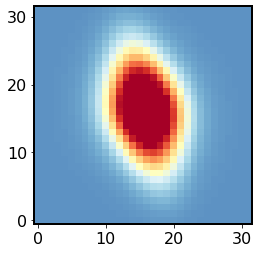

In [88]:
gc.collect()
rcut=16
scale=0.168
ngrid=64
beg =   ngrid//2-rcut
end =   beg+2*rcut

psfFWHM =   0.6
psfInt  =   galsim.Moffat(beta=3.5,fwhm=psfFWHM,trunc=psfFWHM*4.)
psfInt  =   psfInt.shear(e1=0.02,e2=-0.02)
psfInt  =   psfInt.shift(
    dx  =   0.5*scale,
    dy  =   0.5*scale,
)
ig=32

outDir='galaxy_basicShift_psf60'
psfData =   psfInt.drawImage(nx=ngrid,ny=ngrid,scale=scale).array[beg:end,beg:end]
results=[]
fpTask  =   fpfs.image.measure_source(psfData,noiFit=0.,beta=0.75,sigma_arcsec=0.7)

for _ in range(2):
    rot2=np.pi/2.*_
    gal=fpfs.simutil.make_basic_sim(outDir,'g1-0000',Id0=ig,ny=1,nx=2,do_write=False,return_array=True,rot2=rot2)
    gal =   gal[beg:end,beg:end]
    modes=  fpTask.measure(gal)
    results.append(modes)
    
plt.close()
plt.imshow(gal,aspect='equal',cmap='RdYlBu_r',origin='lower',interpolation='None',\
             norm=simple_norm(a,'asinh',asinh_a=0.1,min_cut=-0.01,max_cut=0.2))
mms =   rfn.stack_arrays(results,usemask=False)
ells=   fpfs.catalog.fpfsM2E(mms,const=12,noirev=False)
resp=np.average(ells['fpfs_R1E'])
shear=np.average(ells['fpfs_e1'])/resp
print((shear+0.02)/0.02)